#  DATA SCIENCE:CASE STUDY #
## Data Investigation and Exploratory Analysis for Mavencloudlimited_call_records
*** Author: Nkahebwa Norris(2023) ***
#### Solution 1 and 2

In [1]:
#import the data manipulation libraries
import pandas as pd
import numpy as np
import statistics as stat

# Importing data encoding libraries
from sklearn.preprocessing import LabelEncoder

#importing the data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sbn

#Evaluation libraries
from sklearn.model_selection import cross_val_score


Import the dataset

In [2]:
# load the dataset
data = pd.read_csv("/home/future/Desktop/Data_science_class/Case_Study/drive-download-20230314T185227Z-001/mavencloudlimited_call_records.csv")

In [3]:
# Copy of the dataset
df = data.copy()

### Having a look and a feel of the data

In [4]:
# View columns titles in the data set
df.columns

Index(['call_id', 'destination_person_id', 'source_person_id', 'account_age',
       'account_state', 'occupation', 'language', 'call_direction',
       'call_duration', 'call_outcome', 'call_end_date', 'call_topics',
       'call_topic_group'],
      dtype='object')

In [5]:
# Count the number of entries per column and the data type of each
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32026 entries, 0 to 32025
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   call_id                32026 non-null  int64  
 1   destination_person_id  32026 non-null  int64  
 2   source_person_id       32026 non-null  int64  
 3   account_age            32026 non-null  int64  
 4   account_state          32026 non-null  object 
 5   occupation             31931 non-null  object 
 6   language               32025 non-null  object 
 7   call_direction         32026 non-null  object 
 8   call_duration          32026 non-null  float64
 9   call_outcome           32026 non-null  object 
 10  call_end_date          32026 non-null  object 
 11  call_topics            32026 non-null  object 
 12  call_topic_group       32026 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 3.2+ MB


From the above summary, 
* we can see that there are 32028 rows and 13 columns in which there is 1 float type, 8 object type and 4 integer type data. 
* Columns like call_id, destination_person_id, occupation, language give us information about the customer. where as columns like call_direction,call_duration, call_outcome, call_end_date, call_topics, call_topic_group tell us about the nature of the call. 
* We can also observe that there are some missing values in the above dataset, this can be checked by using .isnull() function.

In [6]:
# A random sample of the data
df.sample(5)

,call_id,destination_person_id,source_person_id,account_age,account_state,occupation,language,call_direction,call_duration,call_outcome,call_end_date,call_topics,call_topic_group
16264,2832013,114325,212954,742,In Repayment,Small Business Owner,Lango,Outgoing,0.62,Customer Unreachable,10/27/17 10:32 AM,Completions Call,Survey
16049,2831655,239005,382879,1,In Repayment,Small Business Owner,Lusoga,Incoming,9.75,Call Resolved,10/27/17 08:56 AM,Code Not Received,Codes
31002,2854054,114160,342833,99,In Repayment,Farmer,Lusoga,Incoming,3.97,Call Resolved,11/03/17 09:17 AM,Payment inquiry,Finance
28294,2849965,85506,118839,727,In Repayment,Farmer,Lango,Incoming,7.85,Call Resolved,11/01/17 06:13 PM,General Question,General
18238,2834815,212967,358871,66,In Repayment,Farmer,Luganda,Incoming,3.13,Call Resolved,10/28/17 08:10 AM,Code Not Received,Codes


In [7]:
df.head(5)

,call_id,destination_person_id,source_person_id,account_age,account_state,occupation,language,call_direction,call_duration,call_outcome,call_end_date,call_topics,call_topic_group
0,2807990,86394,269898,301,In Repayment,Farmer,Luganda,Incoming,0.78,Call Resolved,10/21/17 04:01 AM,Call Dropped,Other
1,2807991,86394,320367,122,In Repayment,Other,Luganda,Incoming,1.93,Call Resolved,10/21/17 04:04 AM,Code Not Received,Codes
2,2807992,212967,129042,695,In Repayment,Mechanic / Technician,Luganda,Incoming,4.90,Call Resolved,10/21/17 04:05 AM,RP Remote Technical,Accessory Technical Issue
3,2807993,114159,372282,22,In Repayment,Farmer,Lango,Incoming,3.77,Call Resolved,10/21/17 04:06 AM,Code Not Received,Codes
4,2807994,86394,366749,44,In Repayment,Electrician,Luganda,Incoming,2.62,Call Resolved,10/21/17 04:07 AM,Code Not Received,Codes


In [8]:
df.tail(5)

,call_id,destination_person_id,source_person_id,account_age,account_state,occupation,language,call_direction,call_duration,call_outcome,call_end_date,call_topics,call_topic_group
32021,2855830,338414,361079,68,In Repayment,Small Business Owner,Lunyankore,Incoming,6.55,Call Resolved,11/03/17 03:08 PM,MM Issue,Finance
32022,2855832,157397,302921,183,In Repayment,Farmer,Ma'di,Incoming,12.90,Call Resolved,11/03/17 03:09 PM,"Redeem Code, Code Entry Support",Codes
32023,2855835,80646,229800,386,In Repayment,Farmer,Luganda,Incoming,1.25,Call Resolved,11/03/17 03:09 PM,Ended Call- Hearing/Speaking Issues,Other
32024,2855836,338372,8029,1146,Cancelled,Boda Boda,English,Incoming,2.98,Call Resolved,11/03/17 03:10 PM,Account Association,Sales
32025,2855837,124255,387315,0,In Repayment,Small Business Owner,Luganda,Incoming,3.08,Call Resolved,11/03/17 03:11 PM,Account Association,Sales


In [9]:
# Descriptive Statistics
df.describe(include="all")

,call_id,destination_person_id,source_person_id,account_age,account_state,occupation,language,call_direction,call_duration,call_outcome,call_end_date,call_topics,call_topic_group
count,3.202600e+04,32026.000000,32026.000000,32026.000000,32026,31931,32025,32026,32026.000000,32026,32026,32026,32026
unique,NaN,NaN,NaN,NaN,4,36,28,2,NaN,12,10950,1210,12
top,NaN,NaN,NaN,NaN,In Repayment,Farmer,Luganda,Incoming,NaN,Call Resolved,10/21/17 12:52 PM,Completions Call,Codes
freq,NaN,NaN,NaN,NaN,28347,11484,9516,24284,NaN,27212,19,4226,7243
mean,2.831673e+06,176394.249641,238988.356710,342.357210,NaN,NaN,NaN,NaN,4.801554,NaN,NaN,NaN,NaN
std,1.374697e+04,97752.252739,106048.676313,306.649513,NaN,NaN,NaN,NaN,4.906148,NaN,NaN,NaN,NaN
min,2.807990e+06,73.000000,89.000000,-10.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,2.819687e+06,108351.000000,155159.000000,64.000000,NaN,NaN,NaN,NaN,1.550000,NaN,NaN,NaN,NaN
50%,2.831606e+06,134577.000000,239082.000000,298.000000,NaN,NaN,NaN,NaN,3.580000,NaN,NaN,NaN,NaN
75%,2.843482e+06,239005.000000,338350.750000,573.000000,NaN,NaN,NaN,NaN,6.200000,NaN,NaN,NaN,NaN


In [10]:
print("The data set has", df.shape[0],"rows and",df.shape[1],"columns.")

The data set has 32026 rows and 13 columns.


In [11]:
# Check for duplicates
df.duplicated().sum()

0

* No duplicates found

In [12]:
df.language.unique()

array(['Luganda', 'Lango', 'Acholi', 'Alur', 'Lumasaba', 'Lusoga',
       'Lunyankore', 'Ateso', 'Lunyoro', 'English', 'Lunyole', 'Lutooro',
       'Rukiga', 'Lugwere', 'Lugbara', 'Japadhola', 'Samia', 'Lukonjo',
       'Kupsabiiny', 'Rufumbira', 'Kinyarwanda', 'Kakwa', 'Lungungu',
       'Kumam', "Ma'di", 'Swahili', "Ng'akarimojong", 'Lubwiisi', nan],
      dtype=object)

* Note: Editing the language from "Karamojong" to "Ng'akarimojong" in the .csv file

In [13]:
df.occupation.unique()

array(['Farmer', 'Other', 'Mechanic / Technician', 'Electrician',
       'Small Business Owner', 'Fisherman', nan, 'UPDF', 'Driver',
       'Boda Boda', 'Teacher', 'Construction', 'Market Trader',
       'Carpenter', 'Shop Keeper', 'Tailor', 'NGO Worker', 'Engineer',
       'Herbalist', 'Office Work', 'Butcher',
       'Government / Civil Servant', 'Security Guard', 'Cattle Trader',
       'Religious Leader', 'Police', 'Health Worker', 'MM Agent',
       'Not Employed', 'Taxi Operator', 'Broker', 'Journalist',
       'Accountant', 'Tour Guide', 'Uganda Prisons', 'Banker',
       'Money Changer'], dtype=object)

In [14]:
df.account_state.unique()

array(['In Repayment', 'Complete', 'Cancelled', 'Suspended'], dtype=object)

In [15]:
df=data.copy()

### Missing values ###

In [16]:
# Create table for missing data for purposes of analysis
def draw_missing_data_table(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat(
        [total, percent], axis=1,
        keys=['Total Nulls in dataset', 'Percent of Nulls'])
    return missing_data

In [17]:
#Missing data analysis
draw_missing_data_table(df)

,Total Nulls in dataset,Percent of Nulls
occupation,95,0.002966
language,1,0.000031
call_id,0,0.000000
destination_person_id,0,0.000000
source_person_id,0,0.000000
account_age,0,0.000000
account_state,0,0.000000
call_direction,0,0.000000
call_duration,0,0.000000
call_outcome,0,0.000000


#### Observations ####
> In the above block we can see that;
* Occupation has the highest number of null values and least being associated with language being only one.


In [18]:
#drop missing data
df=df.dropna()

In [19]:
#Missing data analysis again to see if the missing entries are dropped.
draw_missing_data_table(df)

,Total Nulls in dataset,Percent of Nulls
call_id,0,0.0
destination_person_id,0,0.0
source_person_id,0,0.0
account_age,0,0.0
account_state,0,0.0
occupation,0,0.0
language,0,0.0
call_direction,0,0.0
call_duration,0,0.0
call_outcome,0,0.0


# SOLUTIONS PART I

# Number 1

a. When do we experience the most incoming call traffic?

Making sure that the timeStamp column is in datetime format, we convert it using pd.to_datetime() function and then divide timeStamp column into;
* Month, 
* Hours, 
* Day of Week, 
* Date and.
* Year columns.

In [20]:
#Function
def look_for_unique_values(data_set, column):
    print(data_set[column].unique())

In [21]:
look_for_unique_values(df, "call_end_date",)

['10/21/17 04:01 AM' '10/21/17 04:04 AM' '10/21/17 04:05 AM' ...
 '11/03/17 03:09 PM' '11/03/17 03:10 PM' '11/03/17 03:11 PM']


In [22]:
def convert_and_check(data_set, column_name):
    transformed_string = []

    try:
        for i in data_set[str(column_name)]:
            transformed_string.append(str(i).replace("-","/"))
        data_set[column_name] = transformed_string
        return data_set[column_name]
    
    except:
        data_set.astype({column_name: "float"}).dtypes
        return data_set.info()

In [23]:
convert_and_check(df,"call_end_date",)

0        10/21/17 04:01 AM
1        10/21/17 04:04 AM
2        10/21/17 04:05 AM
3        10/21/17 04:06 AM
4        10/21/17 04:07 AM
               ...        
32021    11/03/17 03:08 PM
32022    11/03/17 03:09 PM
32023    11/03/17 03:09 PM
32024    11/03/17 03:10 PM
32025    11/03/17 03:11 PM
Name: call_end_date, Length: 31931, dtype: object

In [24]:
look_for_unique_values(df, "call_end_date",)

['10/21/17 04:01 AM' '10/21/17 04:04 AM' '10/21/17 04:05 AM' ...
 '11/03/17 03:09 PM' '11/03/17 03:10 PM' '11/03/17 03:11 PM']


In [25]:
from datetime import datetime

# Convert the 'duration' column to a timedelta object
df['call_duration'] = pd.to_timedelta(df['call_duration'], unit ='m')
df['call_duration']

0       0 days 00:00:46.800000
1       0 days 00:01:55.800000
2              0 days 00:04:54
3       0 days 00:03:46.200000
4       0 days 00:02:37.200000
                 ...          
32021          0 days 00:06:33
32022          0 days 00:12:54
32023          0 days 00:01:15
32024   0 days 00:02:58.800000
32025   0 days 00:03:04.800000
Name: call_duration, Length: 31931, dtype: timedelta64[ns]

In [26]:
# Convert the 'start_time' column to a datetime object
df['call_end_date'] = pd.to_datetime(df['call_end_date'])

In [27]:
# Subtracting the 'call_duration' column from the 'call_end_date' column to get the 'call_start_date' column
df['call_start_date'] = df['call_end_date'] - df['call_duration']
df.head(5)

,call_id,destination_person_id,source_person_id,account_age,account_state,occupation,language,call_direction,call_duration,call_outcome,call_end_date,call_topics,call_topic_group,call_start_date
0,2807990,86394,269898,301,In Repayment,Farmer,Luganda,Incoming,0 days 00:00:46.800000,Call Resolved,2017-10-21 04:01:00,Call Dropped,Other,2017-10-21 04:00:13.200
1,2807991,86394,320367,122,In Repayment,Other,Luganda,Incoming,0 days 00:01:55.800000,Call Resolved,2017-10-21 04:04:00,Code Not Received,Codes,2017-10-21 04:02:04.200
2,2807992,212967,129042,695,In Repayment,Mechanic / Technician,Luganda,Incoming,0 days 00:04:54,Call Resolved,2017-10-21 04:05:00,RP Remote Technical,Accessory Technical Issue,2017-10-21 04:00:06.000
3,2807993,114159,372282,22,In Repayment,Farmer,Lango,Incoming,0 days 00:03:46.200000,Call Resolved,2017-10-21 04:06:00,Code Not Received,Codes,2017-10-21 04:02:13.800
4,2807994,86394,366749,44,In Repayment,Electrician,Luganda,Incoming,0 days 00:02:37.200000,Call Resolved,2017-10-21 04:07:00,Code Not Received,Codes,2017-10-21 04:04:22.800


In [28]:
df.head(5)

,call_id,destination_person_id,source_person_id,account_age,account_state,occupation,language,call_direction,call_duration,call_outcome,call_end_date,call_topics,call_topic_group,call_start_date
0,2807990,86394,269898,301,In Repayment,Farmer,Luganda,Incoming,0 days 00:00:46.800000,Call Resolved,2017-10-21 04:01:00,Call Dropped,Other,2017-10-21 04:00:13.200
1,2807991,86394,320367,122,In Repayment,Other,Luganda,Incoming,0 days 00:01:55.800000,Call Resolved,2017-10-21 04:04:00,Code Not Received,Codes,2017-10-21 04:02:04.200
2,2807992,212967,129042,695,In Repayment,Mechanic / Technician,Luganda,Incoming,0 days 00:04:54,Call Resolved,2017-10-21 04:05:00,RP Remote Technical,Accessory Technical Issue,2017-10-21 04:00:06.000
3,2807993,114159,372282,22,In Repayment,Farmer,Lango,Incoming,0 days 00:03:46.200000,Call Resolved,2017-10-21 04:06:00,Code Not Received,Codes,2017-10-21 04:02:13.800
4,2807994,86394,366749,44,In Repayment,Electrician,Luganda,Incoming,0 days 00:02:37.200000,Call Resolved,2017-10-21 04:07:00,Code Not Received,Codes,2017-10-21 04:04:22.800


In [29]:
# Convert the date column to datetime objects using pd.to_datetime()
df['call_start_date'] = pd.to_datetime(df['call_start_date'])


In [30]:
# access the 'components' attribute of the 'date' column
df['Year'] = df['call_start_date'].dt.year
df['Month'] = df['call_start_date'].dt.month
df['Day'] = df['call_start_date'].dt.day
df["Day_of_Week"]=df["call_start_date"].dt.day_of_week
df['Date']=df['call_end_date'].dt.date
df['Hour'] = df['call_start_date'].dt.hour
df['Minute'] = df['call_start_date'].dt.minute
df.head(5)

,call_id,destination_person_id,source_person_id,account_age,account_state,occupation,language,call_direction,call_duration,call_outcome,...,call_topics,call_topic_group,call_start_date,Year,Month,Day,Day_of_Week,Date,Hour,Minute
0,2807990,86394,269898,301,In Repayment,Farmer,Luganda,Incoming,0 days 00:00:46.800000,Call Resolved,...,Call Dropped,Other,2017-10-21 04:00:13.200,2017,10,21,5,2017-10-21,4,0
1,2807991,86394,320367,122,In Repayment,Other,Luganda,Incoming,0 days 00:01:55.800000,Call Resolved,...,Code Not Received,Codes,2017-10-21 04:02:04.200,2017,10,21,5,2017-10-21,4,2
2,2807992,212967,129042,695,In Repayment,Mechanic / Technician,Luganda,Incoming,0 days 00:04:54,Call Resolved,...,RP Remote Technical,Accessory Technical Issue,2017-10-21 04:00:06.000,2017,10,21,5,2017-10-21,4,0
3,2807993,114159,372282,22,In Repayment,Farmer,Lango,Incoming,0 days 00:03:46.200000,Call Resolved,...,Code Not Received,Codes,2017-10-21 04:02:13.800,2017,10,21,5,2017-10-21,4,2
4,2807994,86394,366749,44,In Repayment,Electrician,Luganda,Incoming,0 days 00:02:37.200000,Call Resolved,...,Code Not Received,Codes,2017-10-21 04:04:22.800,2017,10,21,5,2017-10-21,4,4


In [31]:
# lets us segment the data set to only contain those columns of necessity
Call_time_summary_data= df[['call_start_date', 'call_end_date']]

Call_time_summary_data


,call_start_date,call_end_date
0,2017-10-21 04:00:13.200,2017-10-21 04:01:00
1,2017-10-21 04:02:04.200,2017-10-21 04:04:00
2,2017-10-21 04:00:06.000,2017-10-21 04:05:00
3,2017-10-21 04:02:13.800,2017-10-21 04:06:00
4,2017-10-21 04:04:22.800,2017-10-21 04:07:00
...,...,...
32021,2017-11-03 15:01:27.000,2017-11-03 15:08:00
32022,2017-11-03 14:56:06.000,2017-11-03 15:09:00
32023,2017-11-03 15:07:45.000,2017-11-03 15:09:00
32024,2017-11-03 15:07:01.200,2017-11-03 15:10:00


* Incoming Calls Received in October and November

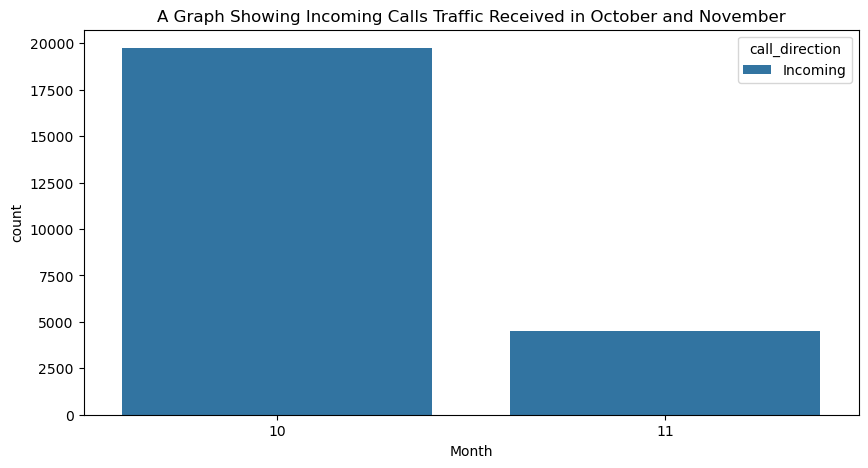

In [32]:
plt.figure(figsize=(10, 5))
plt.title("A Graph Showing Incoming Calls Traffic Received in October and November")
sbn.countplot(x=df['Month'], hue=df['call_direction'], hue_order=['Incoming'])
plt.show()

> b. How this varries over the course of the day

* Calls Received on Each Day

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '2017-10-21'),
  Text(1, 0, '2017-10-22'),
  Text(2, 0, '2017-10-23'),
  Text(3, 0, '2017-10-24'),
  Text(4, 0, '2017-10-25'),
  Text(5, 0, '2017-10-26'),
  Text(6, 0, '2017-10-27'),
  Text(7, 0, '2017-10-28'),
  Text(8, 0, '2017-10-29'),
  Text(9, 0, '2017-10-30'),
  Text(10, 0, '2017-10-31'),
  Text(11, 0, '2017-11-01'),
  Text(12, 0, '2017-11-02'),
  Text(13, 0, '2017-11-03')])

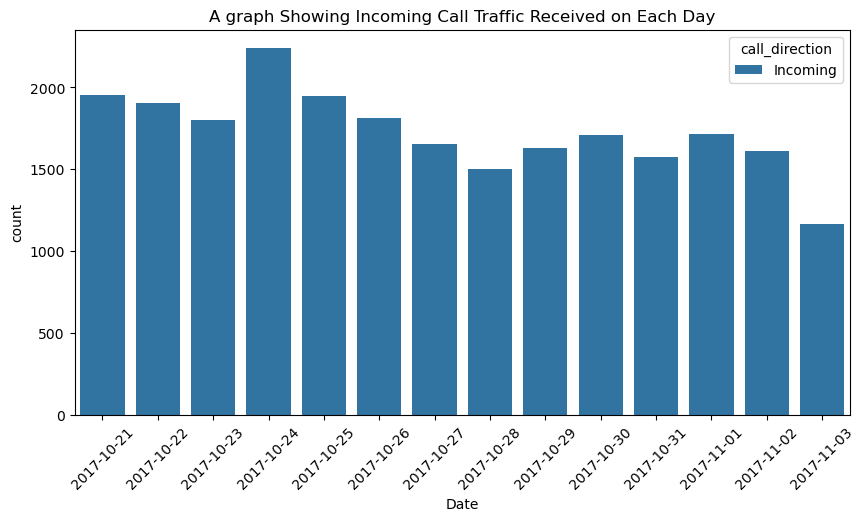

In [33]:
plt.figure(figsize = (10,5))
plt.title("A graph Showing Incoming Call Traffic Received on Each Day")
sbn.countplot(x = df['Date'],hue = df['call_direction'],hue_order=['Incoming'])
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees


<AxesSubplot:title={'center':'Graph Depicting Call Traffic Frequency Per Hour For Each Day'}, xlabel='Date', ylabel='count'>

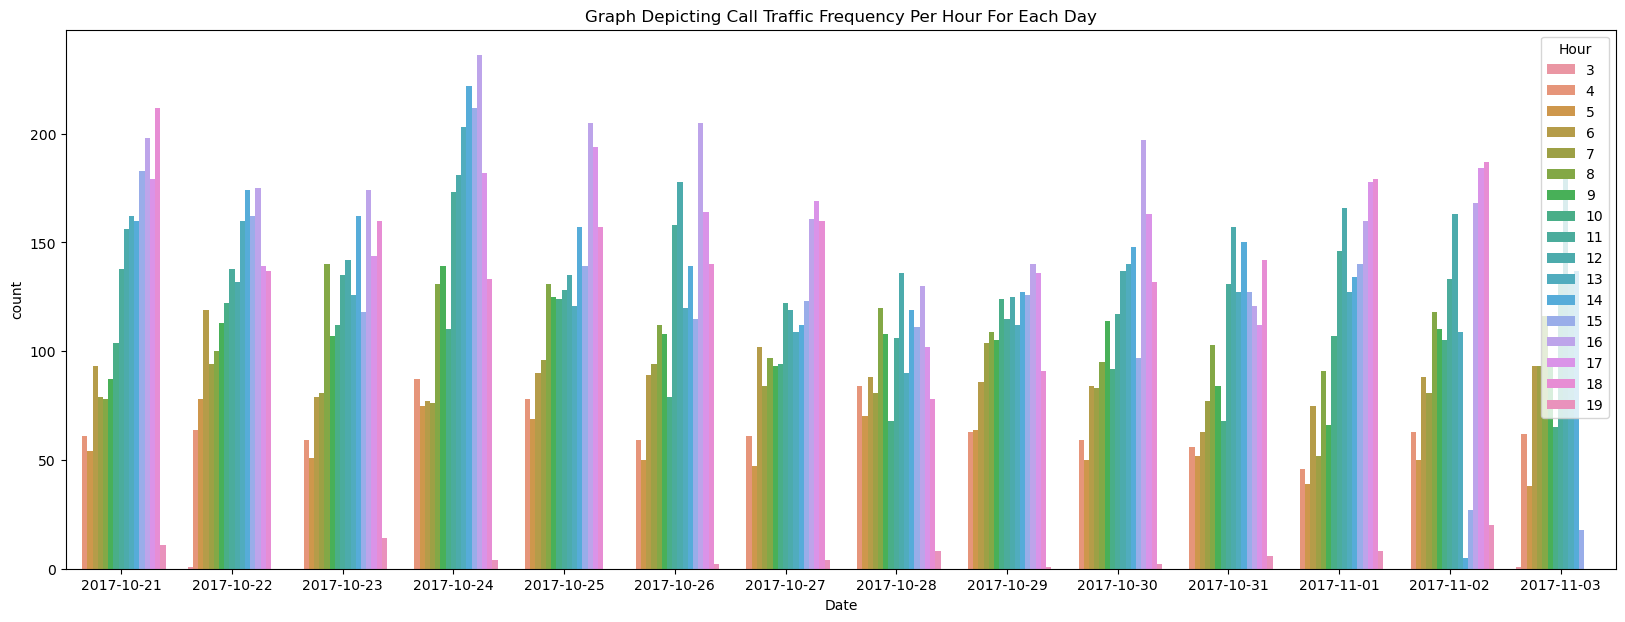

In [34]:
plt.figure(figsize = (20,7))
plt.title("Graph Depicting Call Traffic Frequency Per Hour For Each Day")
sbn.countplot(x='Date', data = df[df['call_direction']=='Incoming'], hue = 'Hour')

> c.Comparison to the Number of Outgoing Calls Made Over The Course of The Day

In [35]:
pd.crosstab(df.call_direction,df.Month,margins=True, margins_name= 'Total')

Month,10,11,Total
call_direction,,,
Incoming,19739,4490,24229
Outgoing,6454,1248,7702
Total,26193,5738,31931


In [36]:
pd.crosstab(df.Date,df.call_direction,margins=True, margins_name= 'Total')

call_direction,Incoming,Outgoing,Total
Date,,,
2017-10-21,1955,467,2422
2017-10-22,1908,666,2574
2017-10-23,1804,703,2507
2017-10-24,2241,604,2845
2017-10-25,1949,757,2706
2017-10-26,1812,593,2405
2017-10-27,1657,627,2284
2017-10-28,1499,461,1960
2017-10-29,1628,407,2035


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '2017-10-21'),
  Text(1, 0, '2017-10-22'),
  Text(2, 0, '2017-10-23'),
  Text(3, 0, '2017-10-24'),
  Text(4, 0, '2017-10-25'),
  Text(5, 0, '2017-10-26'),
  Text(6, 0, '2017-10-27'),
  Text(7, 0, '2017-10-28'),
  Text(8, 0, '2017-10-29'),
  Text(9, 0, '2017-10-30'),
  Text(10, 0, '2017-10-31'),
  Text(11, 0, '2017-11-01'),
  Text(12, 0, '2017-11-02'),
  Text(13, 0, '2017-11-03')])

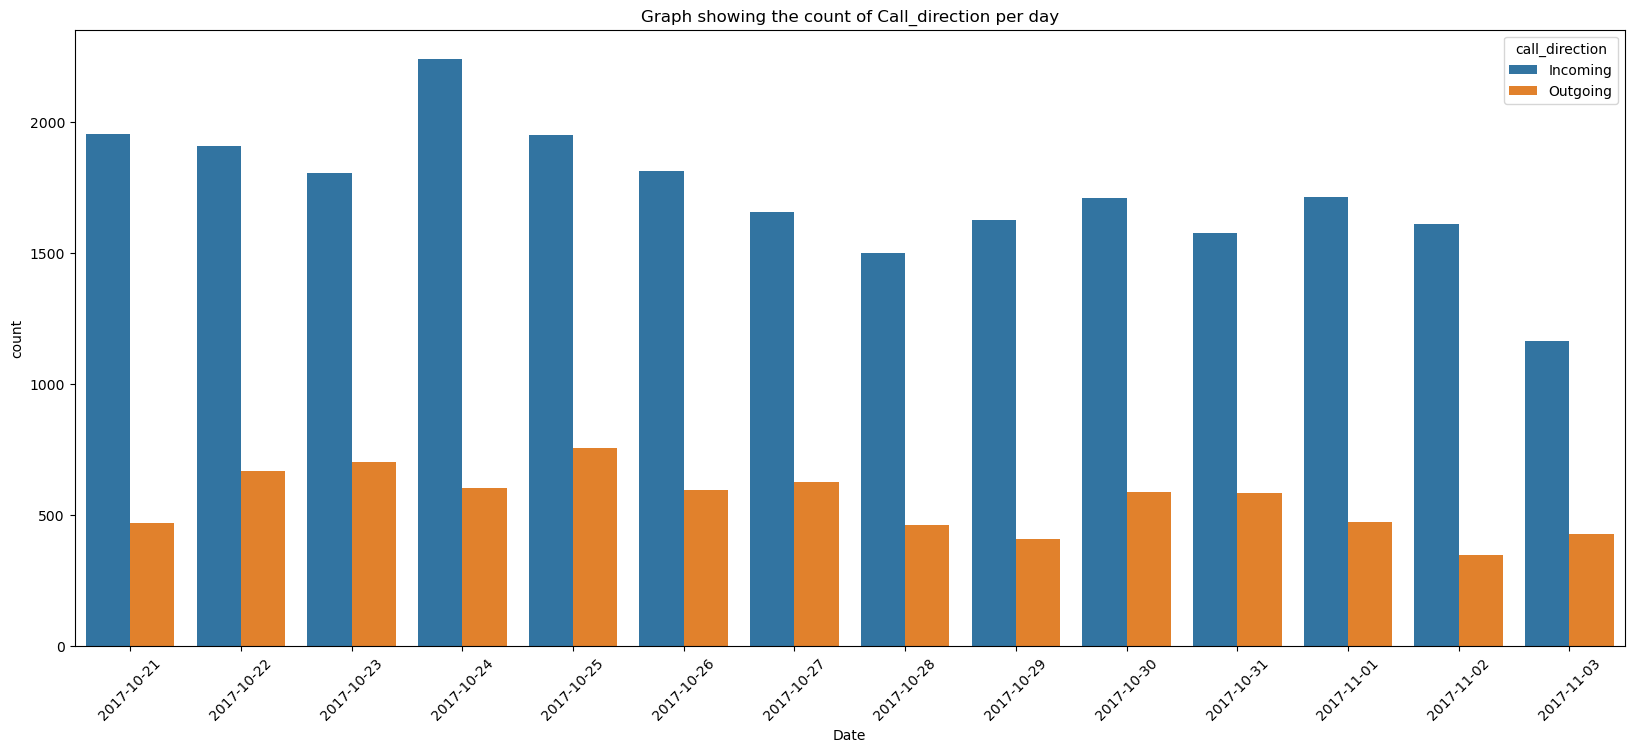

In [37]:
plt.figure(figsize = (20,8))
plt.title("Graph showing the count of Call_direction per day")
sbn.countplot(x='Date',hue='call_direction',data = df)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

<AxesSubplot:title={'center':'Graph Showing the Count of Call_direction Per Month'}, xlabel='Month', ylabel='count'>

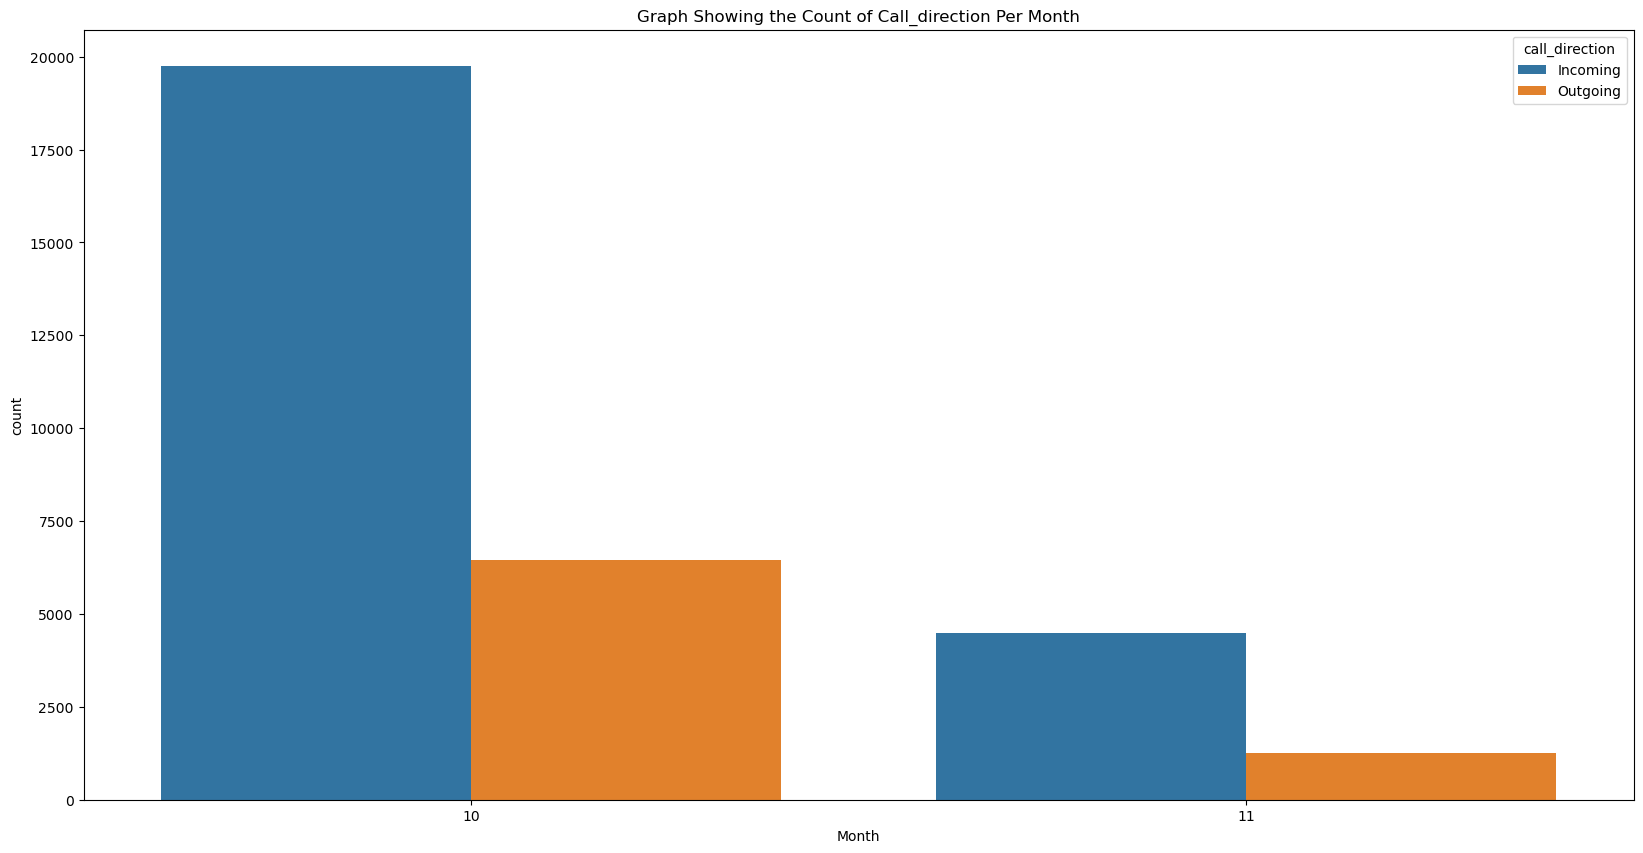

In [38]:
plt.figure(figsize = (20,10))
plt.title("Graph Showing the Count of Call_direction Per Month")
sbn.countplot(x= df['Month'],hue = df['call_direction'])

### QN 2:How many customers do we talk to each day? How many customers called Maven Cloud limited multiple times in the 2 week period? What were we discussing with the customers who contacted us multiple times?

# SOLUTIONS PART 2

In [39]:
from datetime import datetime
# converting the 'call_end_date' column to a datetime object
df['call_end_date'] = pd.to_datetime(df['call_end_date'])

In [40]:
#'call_end_date' column summary 
print(df['call_end_date'].describe())

count                   31931
unique                  10943
top       2017-10-21 12:52:00
freq                       19
first     2017-10-21 04:01:00
last      2017-11-03 15:11:00
Name: call_end_date, dtype: object


/home/future/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


> Solution a: Customers we Talk to Each Day

In [41]:
# accessing the 'components' of the 'date' column
df['Date']=df['call_end_date'].dt.date

In [42]:
#Grouping the DataFrame by Topics and counting the number of IDs for each topic
counts1234 = df.groupby('Date')['call_id'].count()

print(counts1234)


Date
2017-10-21    2422
2017-10-22    2574
2017-10-23    2507
2017-10-24    2845
2017-10-25    2706
2017-10-26    2405
2017-10-27    2284
2017-10-28    1960
2017-10-29    2035
2017-10-30    2297
2017-10-31    2158
2017-11-01    2187
2017-11-02    1959
2017-11-03    1592
Name: call_id, dtype: int64


> Solution b:Customers that Called Maven Cloud limited multiple times in 2 weeks period

In [43]:
# Using source_person_id as a unique identifier to find where the unique id appeared atleast once
value_counts = df['source_person_id'].value_counts()
output= value_counts[value_counts > 2].index.tolist()

In [44]:
#We now get the value counts total

result = pd.Series(output)

# Get the value counts
counts = result.value_counts().sum()

# Print the result
print(counts)

2438


In [45]:
# Using destination_person_id, we find where the unique id is appearing atleast once
value_counts2 = df['destination_person_id'].value_counts()
output2 = value_counts2[value_counts2 > 2].index.tolist()

In [46]:
#Hence we get the value counts totals.

output2 = pd.Series(output2)

# Get the value counts
counts2 = output2.value_counts().sum()

# Print the result
print(counts2)

758


> Solution c: Discussions with Customers who Contacted us multiple times

In [47]:
# Filtering the records where destination_person_id > 2 and selecting only the "call_topic_group" column
topics_when_destination_person_id_greater_than_2 = df.loc[df['destination_person_id'] > 2, 'call_topic_group']

# Printing the result
print(topics_when_destination_person_id_greater_than_2.unique())


['Other' 'Codes' 'Accessory Technical Issue' 'General ' 'Finance' 'Sales'
 'Technical/ Battery Performance' 'Accessory Non-Technical Issue'
 'Accounts' 'Survey' 'Portfolio Health '
 'Unsellable Kit (Association Errors)']


In [48]:
# Filtering those records where source_person_id > 2 and selecting only the "call_topic_group" column
topics_when_source_person_id_greater_than_2 = df.loc[df['source_person_id'] > 2, 'call_topic_group']

# Printing the result
print(topics_when_source_person_id_greater_than_2.unique())

['Other' 'Codes' 'Accessory Technical Issue' 'General ' 'Finance' 'Sales'
 'Technical/ Battery Performance' 'Accessory Non-Technical Issue'
 'Accounts' 'Survey' 'Portfolio Health '
 'Unsellable Kit (Association Errors)']
